In [ ]:
from link_generation.vae.vae import VAE 
import matplotlib.pyplot as plt 
import torch
import seaborn as sns
from link_generation.vae.utils import get_knot_braids_sig_and_det
from link_generation.predicting_signature.utils import get_knot_graph_dataloader
import pandas as pd
import torch

/home/nattd/.conda/envs/knotenv/lib/python3.11/site-packages/snappy/pari.py:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import parse_version


In [2]:
model7 = VAE.load_from_checkpoint('logs/vae_potholder_7/version_10/checkpoints/epoch=46-step=3290.ckpt' ,log_det_mean=0, log_det_std=0, sig_min=0, sig_max=0, potholder_size=7, map_location=torch.device('cpu'))
model9 = VAE.load_from_checkpoint('logs/vae_potholder_9/version_0/checkpoints/epoch=72-step=5110.ckpt', log_det_mean=0, log_det_std=0, sig_min=0, sig_max=0, potholder_size=9, map_location=torch.device('cpu'))
model11 = VAE.load_from_checkpoint('logs/vae_potholder_11/version_0/checkpoints/epoch=66-step=4690.ckpt', log_det_mean=0, log_det_std=0, sig_min=0, sig_max=0, potholder_size=11, map_location=torch.device('cpu'))

In [3]:
braids, sig, log_det = get_knot_braids_sig_and_det('train', ipynb=True)
y = torch.cat([torch.tensor(sig, dtype=torch.float32).unsqueeze(1),torch.tensor(log_det, dtype=torch.float32).unsqueeze(1)], dim=1).unsqueeze(1)
data_loader = get_knot_graph_dataloader(braids, y, both=False, pos_neg=False, ohe_inverses=True, undirected=True, laplacian=False, k=1, batch_size=128, shuffle=True)

/home/nattd/repos/link-generation/src/link_generation/predicting_signature/utils.py:158: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return Data(x=node_features, edge_index=torch.LongTensor(edges).t(), y=torch.tensor(y))
/home/nattd/repos/link-generation/src/link_generation/predicting_signature/utils.py:196: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /opt/conda/conda-bld/pytorch_1724789121465/work/aten/src/ATen/native/Copy.cpp:305.)
  node_features[:,:k] = get_laplacian_positional_ecoding(edges, k, len(braid_word))


In [14]:
# see how well the encoder positions latent embeddings with respect to invariants
def plot_encoder_results(model, data_loader, potholder_size) :
    for batch in data_loader :
        z, mu, logvar, invariants = model(batch)
        df = pd.DataFrame({
            'z1': z.detach().numpy()[:,0],
            'z2': z.detach().numpy()[:,1],
            'sig': batch.y.numpy()[:,0],
            'log_det': batch.y.numpy()[:,1]
        })
        break

    sns.scatterplot(data=df, x='z1', y='z2', hue='sig')
    plt.title(f'Latent Embeddings by Original Signature for Size {potholder_size} Potholders')
    plt.show()

    sns.scatterplot(data=df, x='z1', y='z2', hue='log_det')
    plt.title(f'Latent Embeddings By Original Log Determinant for Size {potholder_size} Potholders')
    plt.show()

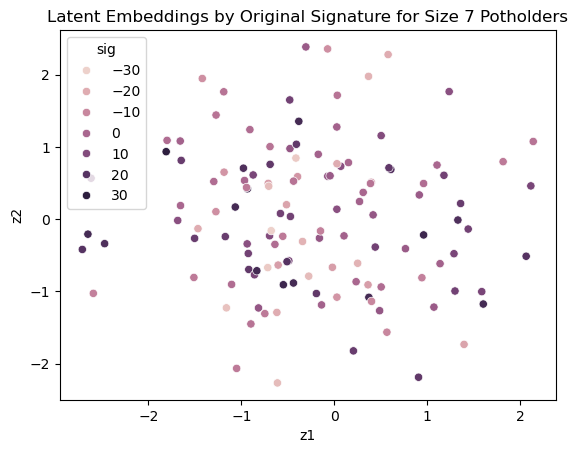

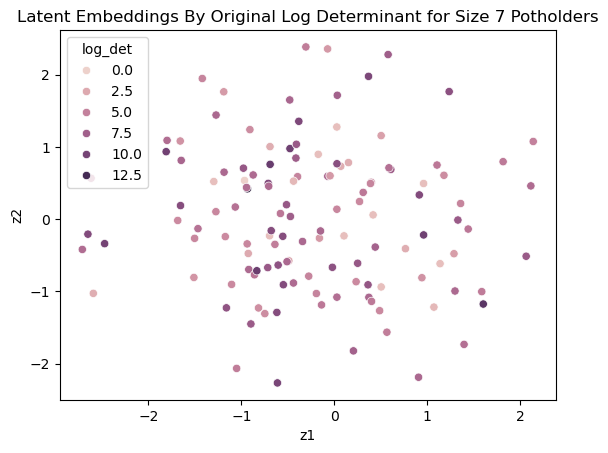

In [15]:
plot_encoder_results(model7, data_loader, 7)

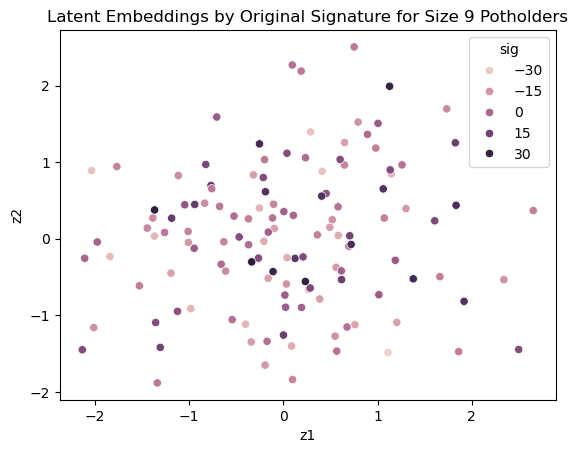

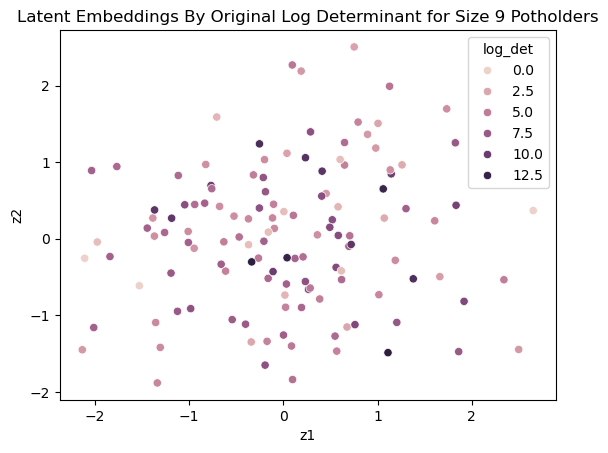

In [27]:
plot_encoder_results(model9, data_loader, 9)

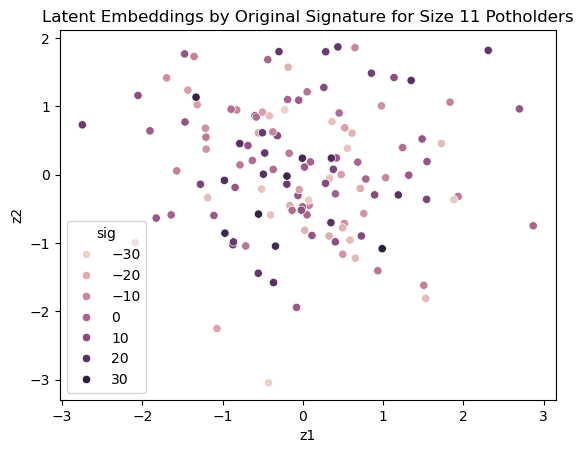

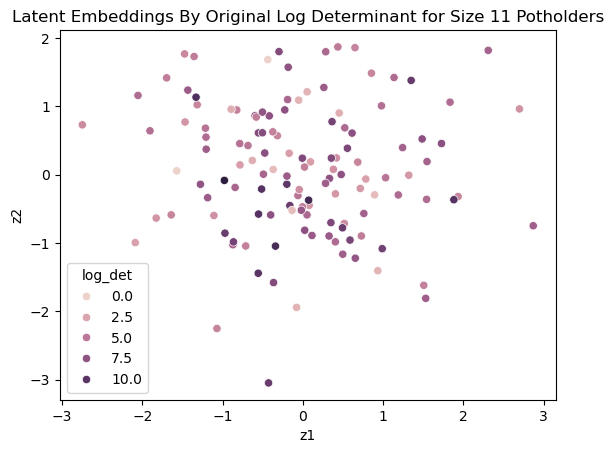

In [16]:
plot_encoder_results(model11, data_loader, 11)

In [23]:
def plot_decoder_results(model, potholder_size) :
    random_latents = torch.randn((256, 2))
    sig, log_det = model.latent_to_invariants(random_latents)
    df = pd.DataFrame({
        'z1': random_latents.numpy()[:,0],
        'z2': random_latents.numpy()[:,1],
        'sig': sig.detach().numpy(),
        'log_det': log_det.detach().numpy()
    })

    sns.scatterplot(data=df, x='z1', y='z2', hue='sig')
    plt.title(f'Latent Embeddings by Decoded Signature for Size {potholder_size} Potholders')
    plt.show()

    sns.scatterplot(data=df, x='z1', y='z2', hue='log_det')
    plt.title(f'Latent Embeddings By Decoded Log Determinant for Size {potholder_size} Potholders')
    plt.show()

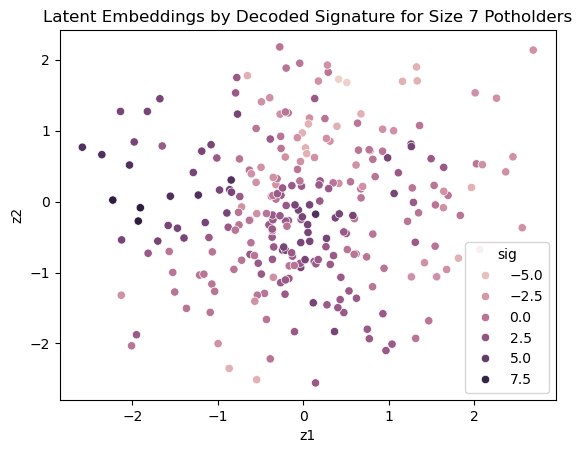

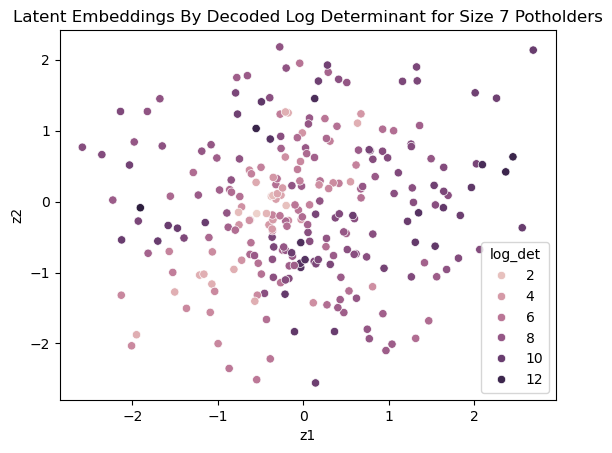

In [24]:
plot_decoder_results(model7, 7)

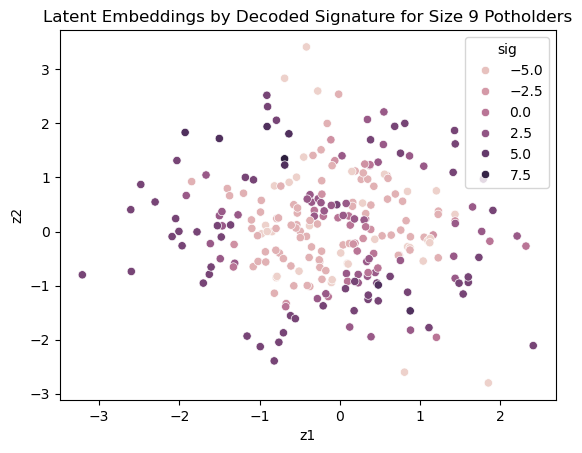

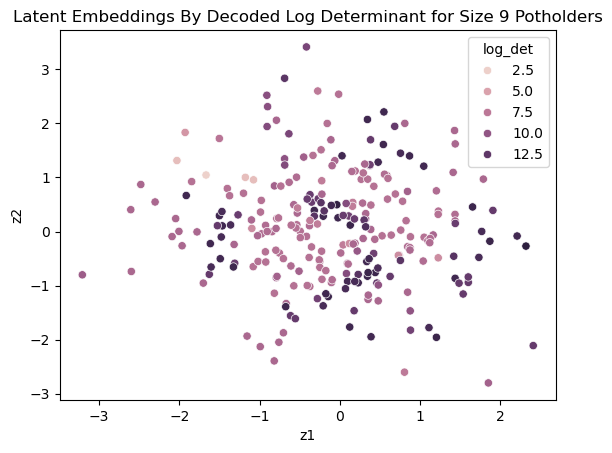

In [25]:
plot_decoder_results(model9, 9)

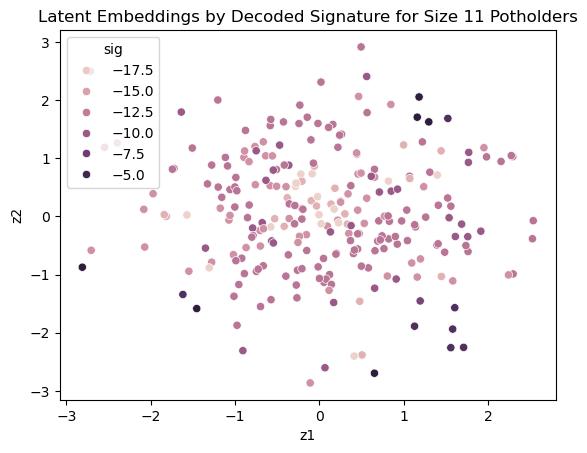

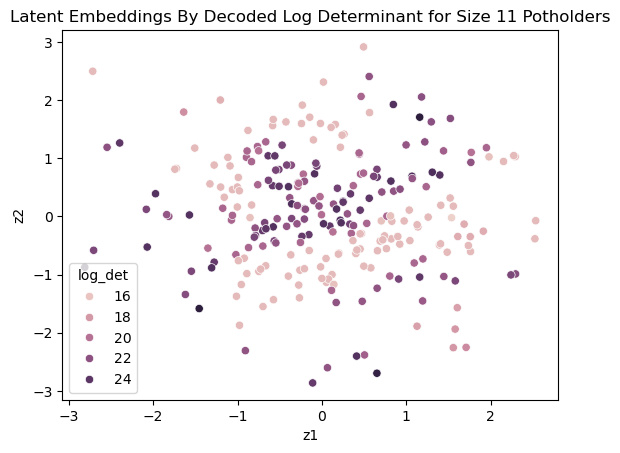

In [26]:
plot_decoder_results(model11, 11)